In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import csv
from sklearn import cluster
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

In [4]:
bound_data = []
file_name = 'data_for_graphs/ratio_bound_data.csv'
data_file = open(file_name, 'r')
rdr = csv.reader(data_file)
for row in rdr:
    bound_data.append([float(obs) for obs in row])

In [5]:
ratios = [row[-1] for row in bound_data]
ratios_inverse = [1.0/obs for obs in ratios]
dataset = [[ratios_inverse[i]] for i in range(len(ratios_inverse))]
dataset_np = np.array(dataset)

In [77]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(dataset_np)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

### Splitting data_set into 3 lists for graphing

In [78]:
groups = list(set(k_means.labels_))
grouped_bound_data = [[dataset[i] for i in range(len(dataset)) if k_means.labels_[i] == g] for g in groups]
print [len(row) for row in grouped_bound_data]
print sum([len(row) for row in grouped_bound_data])

[3193179, 2814184, 1192637]
7200000


### Write clustered data to file

In [88]:
clustered_bound_data = [bound_data[i] + [k_means.labels_[i]] for i in range(len(bound_data))]
clustered_bound_data[0]

[0.1,
 0.1,
 1.0,
 1.0,
 0.0,
 0.0,
 0.2,
 0.2,
 0.2,
 0.2,
 80.0,
 57.14912280701755,
 3.5009596928982725,
 0]

In [89]:
file_name = 'data_for_graphs/clustered_bound_data.csv'
data_file = open(file_name, 'w')
wrtr = csv.writer(data_file)
for row in clustered_bound_data:
    wrtr.writerow(row)

# Plotting

In [79]:
grouped_ratios = [[row[-1] for row in group] for group in grouped_bound_data]
mean_A = sum(grouped_ratios[0])/len(grouped_ratios[0])
mean_B = sum(grouped_ratios[1])/len(grouped_ratios[1])
mean_C = sum(grouped_ratios[2])/len(grouped_ratios[2])

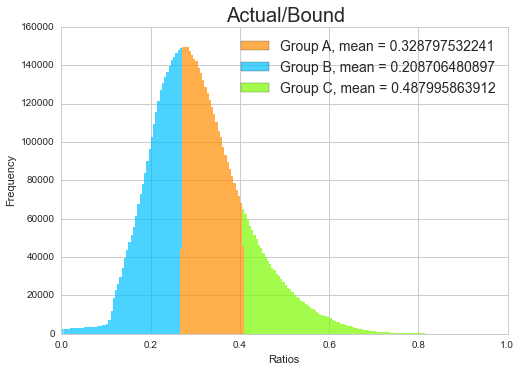

In [80]:
bins = [i/200.0 for i in range(200)]
width = 1.0/200.0
fig, ax = plt.subplots()
plt.hist(grouped_ratios, bins=bins, width=width, edgecolor="none", alpha=0.7, stacked=True, color=['darkorange', 'deepskyblue', 'lawngreen'], label=['Group A, mean = '+str(mean_A), 'Group B, mean = '+str(mean_B), 'Group C, mean = '+str(mean_C)])
plt.xlabel('Ratios')
plt.ylabel('Frequency')
plt.legend(fontsize=14)
ax.set_title('Actual/Bound', fontsize=20)
plt.show()